In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("/content/crack_detection.csv")
df.head()

,Unnamed: 0,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
0,0,107.5734,29.267480,0.744029,0.408828,110.2533,26.953218,1.254689,-0.135613,113.5715,...,9.181953,177,173,162,0.951368,0.913876,0.803333,856.585412,726.475939,0
1,1,178.6713,14.917756,3.192406,0.238175,184.4947,14.882156,3.035196,0.141160,190.8538,...,9.207314,142,136,129,0.988325,0.989474,0.976787,222.539456,221.478572,0
2,2,176.6517,34.618255,-0.146336,-0.421552,161.3083,33.688699,0.057178,-0.521476,147.2760,...,9.186737,199,200,194,0.968581,0.967398,0.890845,1198.423587,1134.928451,1
3,3,113.5760,20.084502,0.719752,0.737728,114.0056,19.536222,0.655846,0.729521,113.6179,...,9.197973,146,142,138,0.987383,0.983663,0.961305,403.387224,381.663969,0
4,4,125.3565,29.251595,0.430344,0.833496,129.5277,28.661968,0.475502,0.804161,131.9745,...,9.189257,173,176,177,0.980727,0.986702,0.950291,855.655808,821.508433,1


In [71]:
X = df.iloc[:,1:24].values
y = df.iloc[:,24:25].values
def normalize(X):
  return (X - np.mean(X,axis = 0))/np.std(X,axis = 0)
X = normalize(X)

In [72]:
print([X.shape,y.shape])

[(700, 23), (700, 1)]


In [73]:
print(y)

[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]


In [74]:
print(X)

[[-0.99169947 -0.0471889  -0.01345457 ... -2.24133939 -0.21474566
  -0.2965404 ]
 [ 2.16573183 -1.52427552  0.82530032 ...  0.26902558 -1.33609808
  -1.2672997 ]
 [ 2.07604215  0.50359226 -0.31847241 ... -0.97478509  0.38981787
   0.48863018]
 ...
 [-0.2217964  -0.54710779 -0.27344668 ... -0.06826355 -0.67580554
  -0.61549879]
 [-1.30420115  1.17160362 -0.40046978 ...  0.51895982  1.25895594
   1.51249747]
 [ 0.36290521 -2.37768162  0.53296861 ... -0.4600382  -1.65200316
  -1.61605624]]


In [76]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

In [77]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.2)

In [78]:
def sigmoid(x):
  return 1.0/(1+np.exp(-x))
def forward(X,W,b):
  y = sigmoid(np.dot(X,W)+b)
  return y
def predict(X,W,b):
  predicted = sigmoid(np.dot(X,W)+b)
  y = np.where(predicted>0.5,1,0)
  return y
def costFunct(y,y_hat):
  l = -np.mean(np.log(y_hat)*y + np.log(1-y_hat)*(1-y))
  return l  
def gradient(X,Y,W,b):
  m = X.shape[0]
  y_hat = np.expand_dims(forward(X,W,b),axis =1)
  dw = ((1/m)*np.dot(X.T, (y_hat - Y))).squeeze()
  db = (1/m)*(np.sum((y_hat - Y)))
  return dw,db  
def BinarylogRegClassifier(X,Y,num_iter,learning_rate=0.001):
  m,n = X.shape
  W = np.random.random((n))
  b = np.random.random(1)
  losses = []

  for i in range(num_iter):
    Y_hat = forward(X,W,b)
    losses.append([i,costFunct(Y,Y_hat)])
    dw,db = gradient(X,Y,W,b)
    W -= learning_rate*dw
    b -= learning_rate*db

  return losses,W,b  

In [ ]:
np.random.random(1)

In [83]:
losses,W,b = BinarylogRegClassifier(X_train,y_train,10000)
losses = np.asarray(losses)
num_iterations0 = losses[:,0]
loss0 = losses[:,1]
predictions0 = predict(X_train,W,b)

predictions1 = predict(X_valid,W,b)

predictions2 = predict(X_test,W,b)

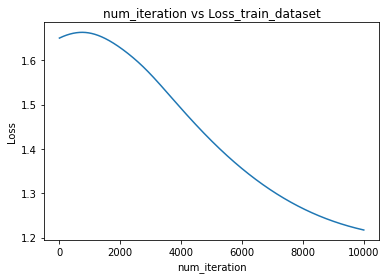

In [84]:
plt.plot(num_iterations0,loss0)
plt.xlabel('num_iteration')
plt.ylabel('Loss')
plt.title("num_iteration vs Loss_train_dataset")
plt.show()


In [85]:
from sklearn.metrics import f1_score
print("train F1 score")
print(f1_score(y_train, predictions0, average='macro'))
print("valid F1 score")
print(f1_score(y_valid, predictions1, average='macro'))
print("test F1 score")
print(f1_score(y_test, predictions2, average='macro'))

train F1 score
0.7542589994262635
valid F1 score
0.7586206896551724
test F1 score
0.691609977324263
